### **Check GPU**

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### **Install Tensorflow Objectdetection API**

In [2]:
# Related Libraries
!apt-get -y install protobuf-compiler python-pil python-lxml python-tk
!pip install matplotlib

# Git clone
!git clone https://github.com/tensorflow/models.git
import os
os.chdir("/content/models")
!git checkout 7f351c62f8e6c6789d76237bfdc43630714b9b8d

# Set PATH
os.chdir("/content/models/research/")
import sys
sys.path.append('/content/models/research')
sys.path.append('/content/models/research/slim')
sys.path.append('/content/models/research/object_detection')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.14-1).
The following additional packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  liblcms2-utils python-genshi python-lxml-dbg python-lxml-doc python-pil-doc
  python-pil-dbg python-setuptools
The following NEW packages will be installed:
  libjbig0 liblcms2-2 libprotobuf10 libprotoc10 libtiff5 libwebp6 libwebpmux3
  libxslt1.1 protobuf-compiler python-bs4 python-chardet python-html5lib
  python-lxml python-olefile python-pil python-pkg-resources python-six
  python-webencodings
0 upgraded, 18 newly installed, 0 to remove and 0 not upgraded.
Need to get 3,751 kB of archives.
After this operation, 14.6 MB of additional disk space will be used.
Get:1 

Selecting previously unselected package python-pil:amd64.
Preparing to unpack .../16-python-pil_4.1.1-3build2_amd64.deb ...
Unpacking python-pil:amd64 (4.1.1-3build2) ...
Selecting previously unselected package protobuf-compiler.
Preparing to unpack .../17-protobuf-compiler_3.0.0-9ubuntu5_amd64.deb ...
Unpacking protobuf-compiler (3.0.0-9ubuntu5) ...
Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Setting up python-pkg-resources (36.2.7-2) ...
Setting up libxslt1.1:amd64 (1.1.29-2.1ubuntu1) ...
Setting up libprotobuf10:amd64 (3.0.0-9ubuntu5) ...
Setting up python-six (1.10.0-4) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up python-bs4 (4.6.0-1) ...
Setting up python-lxml (4.0.0-1) ...
Setting up python-olefile (0.44-1) ...
Setting up libprotoc10:amd64 (3.0.0-9ubuntu5) ...
Setting up python-webencodings (0.5-2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up python-chard

remote: Total 17713 (delta 2), reused 2 (delta 2), pack-reused 17710
Receiving objects: 100% (17713/17713), 470.17 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (10507/10507), done.
Note: checking out '7f351c62f8e6c6789d76237bfdc43630714b9b8d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 7f351c62... Minor update the resnet runloop. (#4113)


### **Compile Protobuf Library**

モデルの設定と学習に使用

In [4]:
os.chdir("/content/models/research/")
!protoc object_detection/protos/*.proto --python_out=.
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/trainer.py -> build/lib/object_detection
copying object_detection/trainer_test.py -> build/lib/object_detection
copying object_detection/exporter_test.py -> build/lib/object_detection
copying object_detection/model_lib_test.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/l

reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_tpu_main.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/exporter.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/export_inference_graph.py -> build/bdist.linux-x86_64/egg/object_detection
creating build/bdist.linux-x86_64/egg/object_detection/anchor_generators
copying build/lib/object_detection/anchor_generators/multiple_grid_anchor_generator_test.py -> build/bdist.linux-x86_64/egg/object_detection/anchor_generators
copying build/

byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch.py to ssd_meta_arch.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/faster_rcnn_meta_arch.py to faster_rcnn_meta_arch.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/rfcn_meta_arch_test.py to rfcn_meta_arch_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/ssd_meta_arch_test.py to ssd_meta_arch_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/meta_architectures/rfcn_meta_arch.py to rfcn_meta_arch.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/model_main.py to model_main.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/builders/hyperparams_builder_te

byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/context_manager.py to context_manager.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_list_ops.py to np_box_list_ops.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/learning_schedules.py to learning_schedules.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/metrics_test.py to metrics_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/static_shape_test.py to static_shape_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/object_detection_evaluation_test.py to object_detection_evaluation_test.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/object_detection/utils/np_box_mask_list.py to np_box_mask_list.cpython-36.pyc
byte-compiling

### **Build Tensorflow-Slim Model**

In [5]:
os.chdir("/content/models/research/slim")
!python setup.py build
!python setup.py install

os.chdir("/content/models/research")
!python object_detection/builders/model_builder_test.py

running build
running build_py
creating build
creating build/lib
creating build/lib/datasets
copying datasets/cifar10.py -> build/lib/datasets
copying datasets/flowers.py -> build/lib/datasets
copying datasets/download_and_convert_mnist.py -> build/lib/datasets
copying datasets/preprocess_imagenet_validation_data.py -> build/lib/datasets
copying datasets/mnist.py -> build/lib/datasets
copying datasets/__init__.py -> build/lib/datasets
copying datasets/process_bounding_boxes.py -> build/lib/datasets
copying datasets/download_and_convert_cifar10.py -> build/lib/datasets
copying datasets/build_imagenet_data.py -> build/lib/datasets
copying datasets/dataset_factory.py -> build/lib/datasets
copying datasets/dataset_utils.py -> build/lib/datasets
copying datasets/download_and_convert_flowers.py -> build/lib/datasets
copying datasets/imagenet.py -> build/lib/datasets
creating build/lib/deployment
copying deployment/model_deploy_test.py -> build/lib/deployment
copying deployment/__init__.py ->

removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing slim-0.1-py3.6.egg
Copying slim-0.1-py3.6.egg to /usr/local/lib/python3.6/dist-packages
Adding slim 0.1 to easy-install.pth file

Installed /usr/local/lib/python3.6/dist-packages/slim-0.1-py3.6.egg
Processing dependencies for slim==0.1
Finished processing dependencies for slim==0.1
/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
...............
----------------------------------------------------------------------
Ran 15 tests in 0.082s

OK


### **Download SSD model pre-trained by MS-COCO Dataset**

In [6]:
os.chdir('/content/models/research/object_detection/')
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
!tar -xzvf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

--2018-06-03 09:04:09--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76534733 (73M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’

ssd_mobilenet_v1_co 100%[===================>]  72.99M  81.2MB/s    in 0.9s    

2018-06-03 09:04:10 (81.2 MB/s) - ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’ saved [76534733/76534733]

ssd_mobilenet_v1_coco_2017_11_17/
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.index
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.meta
ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2017_11_17/saved_model/
ssd_mobilenet_v1_coco_2017_11_17/saved_model/saved_

### **Defein Python code**

In [7]:
import numpy as np
import sys
import os
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
%matplotlib inline

from PIL import Image

from utils import label_map_util
from utils import visualization_utils as vis_util

# モデル読み込み
# TensorflowではTensor(データ)とOperation(計算)から構成されるGraphとしてCNN演算を表現します

# graphオブジェクト生成
detection_graph = tf.Graph() 

# 生成したgraphのコンテキストマネージャを取得
with detection_graph.as_default():
  # graph定義のためのオブジェクトを作成
  od_graph_def = tf.GraphDef()
  
  # モデルファイル(protocol buffer形式)を指定してロード
  with tf.gfile.GFile('ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb', 'rb') as fid:
    # バイナリファイルにシリアライズされたgraphデータを読み込み
    serialized_graph = fid.read()
    # graph構造をparseしてオブジェクトに設定
    od_graph_def.ParseFromString(serialized_graph)
    # graphオブジェクトのdefault_graphに追加
    tf.import_graph_def(od_graph_def, name='')

/content/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist

### **Load label map**

In [0]:
# ラベルマップの読み込み

# ラベルマップは、分類カテゴリのkey名とidを関連付ける辞書データ(name,id,display_name)
# 例：CNNの出力が"5"の場合"飛行機"に相当する、など
label_map = label_map_util.load_labelmap('data/mscoco_label_map.pbtxt')

# ラベルマップからカテゴリストを取得(id,display_nameのリスト)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90, use_display_name=True)

# カテゴリidを入力としてkey名を取得するための辞書を作成
category_index = label_map_util.create_category_index(categories)

# 画像データを[width,height,3]次元のnumpy配列に変換
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

# 入力画像のディレクトリを指定
PATH_TO_TEST_IMAGES_DIR = 'test_images'
# 入力画像のパスを取得
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 
                                  'image{}.jpg'.format(i)) for i in range(1, 3) ]
# 表示する画像のサイズを指定
IMAGE_SIZE = (18, 12)

### **Check images**

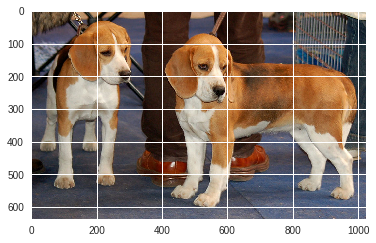

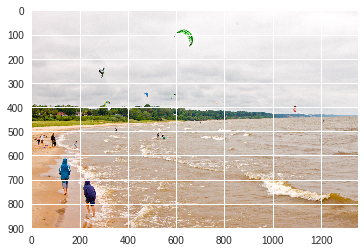

In [9]:
im = Image.open('./test_images/image1.jpg')
im_arr = np.asarray(im)
plt.imshow(im_arr)
plt.show()

im = Image.open('./test_images/image2.jpg')
im_arr = np.asarray(im)
plt.imshow(im_arr)
plt.show()

### **Define inference function**

In [0]:
# SSD推論処理の実装
# 引数：numpy形式の画像データ, 学習済みモデルのgraph
def run_inference_for_single_image(image, graph):
  # default_graphを呼び出し
  with graph.as_default():
    # graphのSessionを取得
    # SessionはgraphのOperationsをGPUなどのデバイスに配置し実行する手段を提供
    with tf.Session() as sess:
      # Operation一覧を取得
      ops = tf.get_default_graph().get_operations()
      # Operationの出力Tensorの名前を取得
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      
      # Tensor辞書を生成
      tensor_dict = {}
      for key in [
          'num_detections',    # batchの中で検出されたboxの個数
          'detection_boxes',   # 検出されたboxの座標
          'detection_scores',  # 検出されたboxのスコア
          'detection_classes', # 検出されたboxの分類クラス
      ]:
        tensor_name = key + ':0' # 0番目の出力
        
        # 各key名がOperationの出力に含まれている場合
        if tensor_name in all_tensor_names:
          # key名に相当するTensorを学習済みモデルから取得してTensor辞書に登録
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      
      # image_tensorのkey名をもつTensorを学習済みモデルから取得
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # 推論処理実行
      output_dict = sess.run(
                tensor_dict, # 取得したいTensorを指定
                feed_dict={image_tensor: np.expand_dims(image, 0)}) # image_tensorの次元を[1,None,None,3]に変換

      # SSDの出力は全てfloat32なので適切な型に変換
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      
  # SSDの出力から取得したTensorを返す
  return output_dict

### **Execute inference**

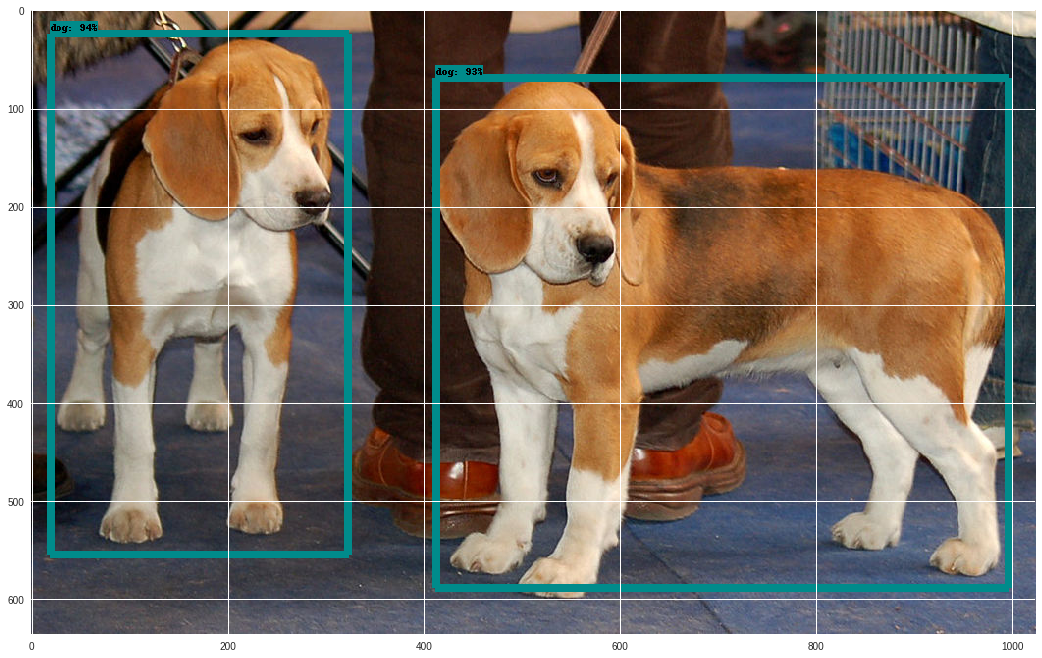

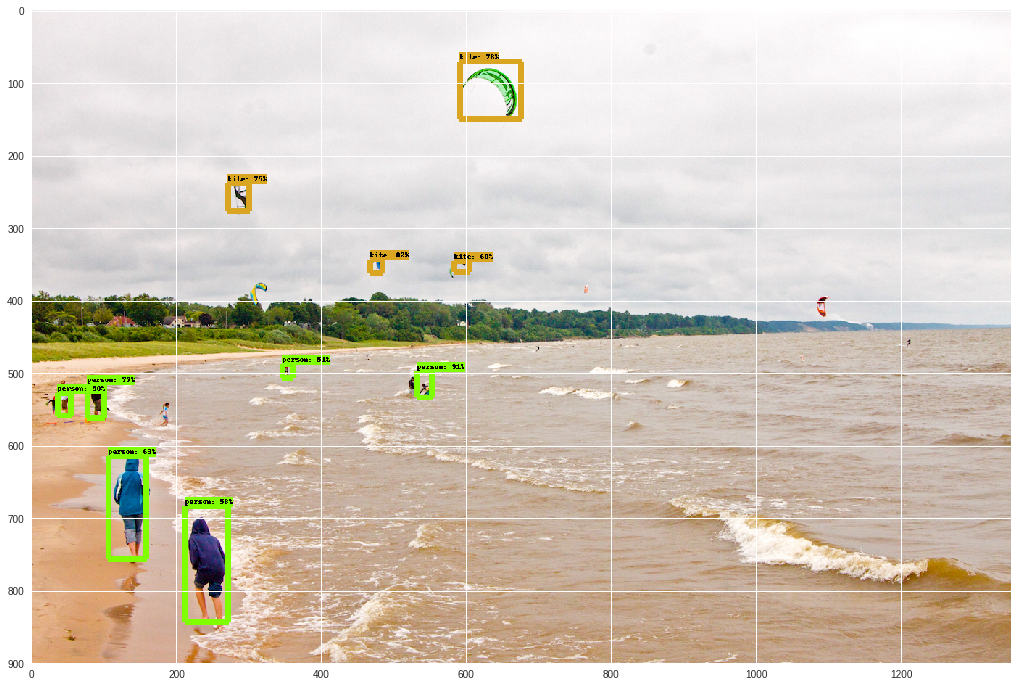

In [11]:
# SSD推論処理の実行

# テスト画像パス読み込み
for image_path in TEST_IMAGE_PATHS:
  # 画像の読み込み
  image = Image.open(image_path)
  # 画像をnumpy配列に変換
  image_np = load_image_into_numpy_array(image)
  # 画像データの0次元目を追加(バッチ分の次元)
  image_np_expanded = np.expand_dims(image_np, axis=0)
  
  # 推論処理の実行
  # 戻り値として辞書に登録したkeyの出力を得る
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  
  # ユーティリティ関数を使用して可視化
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,                                         # numpy配列の画像データ
      output_dict['detection_boxes'],   # 検出されたbbox
      output_dict['detection_classes'], # 検出されたbboxのクラス
      output_dict['detection_scores'],  # 検出されたbboxのスコア
      category_index,                               # カテゴリidとカテゴリ名の辞書　
      instance_masks=None,                   # segmentation用マスク（今回は不使用）
      use_normalized_coordinates=True, # 画像サイズで規格化されたbbox位置(ymin, xmin, ymax, xmax)
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

### **Check inference results**

In [12]:
# output_dictを個々に出力
# 例：スコアが0.5以上の検出結果
(x,y,c) = np.shape(image_np)

for i in range(len(output_dict['detection_classes'])):
  if output_dict['detection_scores'][i] > 0.5:
    print(category_index[output_dict['detection_classes'][i]]['name'],  # 検出されたクラス名
         output_dict['detection_scores'][i], # スコアの値
         np.array(output_dict['detection_boxes'][i].tolist()*np.array([x,y,x,y]), dtype='int')) # 画像上のbox座標

person 0.91687834 [498 532 533 553]
kite 0.82944524 [344 467 361 485]
person 0.77850515 [516  77 561 101]
kite 0.7699845 [ 71 591 149 676]
kite 0.7555387 [239 271 276 301]
person 0.6342344 [615 106 756 159]
kite 0.60740554 [346 583 360 605]
person 0.58910227 [684 212 843 272]
person 0.5123759 [488 346 506 361]
person 0.50146365 [528  36 558  55]


### **Run Inference for your Own Data**

In [13]:
if 1:
  # 画像の読み込み
  image = Image.open('./YOUR_IMAGE_NAME.jpg')
  # 画像をnumpy配列に変換
  image_np = load_image_into_numpy_array(image)
  # 画像データの0次元目を追加(バッチ分の次元)
  image_np_expanded = np.expand_dims(image_np, axis=0)
  
  # 推論処理の実行
  # 戻り値として辞書に登録したkeyの出力を得る
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  
  # ユーティリティ関数を使用して可視化
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,                                         # numpy配列の画像データ
      output_dict['detection_boxes'],   # 検出されたbbox
      output_dict['detection_classes'], # 検出されたbboxのクラス
      output_dict['detection_scores'],  # 検出されたbboxのスコア
      category_index,                               # カテゴリidとカテゴリ名の辞書　
      instance_masks=None,                   # segmentation用マスク（今回は不使用）
      use_normalized_coordinates=True, # 画像サイズで規格化されたbbox位置(ymin, xmin, ymax, xmax)
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

FileNotFoundError: ignored